# 딥러닝 개요.
기존 방식에서는 특징을 하나하나 지정해 주었다면 딥러닝에서는 알아서 특징을 추출한다는 것이다.
딥러닝에서는 대량의 데이터를 학습시키면 특징을 직접 찾아낸다. 
이러한 특징을 찾아 내기 위한 방법으로 신경망을 이용하는 것이라고 할 수 있다.
신경망은 인간의 뇌를 본따 만든 네트워크 구조이다.

입력된 데이터들은 입력층, 중간츨, 출력층을 거쳐 처리가 이루어지고 최종적인 결과가 출력이 된다.
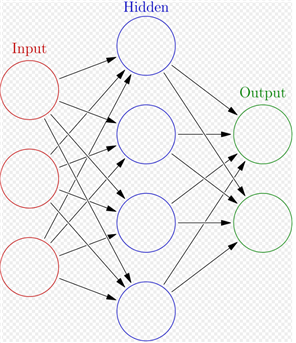
딥러닝은 대량의 데이터를 입력해서 학습을 시키며 학습이란 뉴런의 접속 가충치를 조정하는 것을 의미한다.


# 퍼셉트론
단순 퍼셉트론(Simple Perceptron)
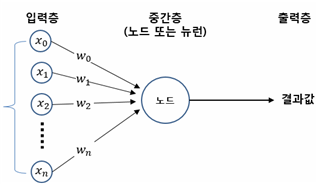

현재 그림에서 퍼셉트론은 x0, x1, x2, ..., xn 라는 출력을 가지고 있다. 각 입력에는 0또는 1을 입력하기로 했으며, 출력에서는 0또는 1이 출력이 나온다.

예로 새로운 스마트폰을 구매해야 할지에 대해 살펴보자.
* 이번달의 수입이 충분한가?(x1)
* 최신 기종을 가지고 있는가?(x2)
* 기존의 스마트폰에 문제가 있는가?(x3)

조건이 대충 절반이상(2개)만족한다는 이유로 스마트폰을 구입해도 될까?

입력 x1, x2, x3에 대한 가중치를 w1, w2, w3라고 했을 때 
부자라면 (w1 = 1, w2 = 8 , w3 = 3)처럼 가중치를 설정할 것이다. 
지금 사용하는 스마트폰에 문제가 생긴 사람이라면 (w1 = 2, w2 = 2, w3 = 8)처럼 가중치를 설정할 것이다 
정기적으로 최신 스카트폰을 구입하는 사람이라면 (w1 = 3, w2 = 6, w3 = 5)처럼 가중치를  설정할 수 있을 것이다.

# TensorFlow
1차원 : 백터
2차원 : 행렬
다차원 행렬 : Tensor(텐서)

#tensorflow(cpu 버전) 설치

pip install  tensorflow

#Keras

pip install keras==2.2.2

pip install –U h5py graphviz pydot 

설치 후 윈도우 운영체제에서는 cuda_11.5.1_496.13_windows.exe과 cudnn64_8.dll을 필요로 할 수 있다.

또한 visual studio c++  설치도 요구할 수 있다.

In [1]:
import tensorflow as tf
hello = tf.constant("hello")
tf.print(hello)

hello


In [2]:
# TensorFlow 임포트 --- (※1)
import tensorflow as tf

# 상수 정의 --- (※2)
a = tf.constant(1234) # 텐서플로우 내부에 상수 정의
b = tf.constant(5000)


# 계산 정의 --- (※3)
# print(a + b) #   덧셈 연산을 하기 위해 덧셈이라는 계산을 정의한다.
@tf.function
def add_op(a, b):
    return a + b

# 세션 시작하기 --- (※4) # 텐서플로우는 계산을 하기 위해 세션이 실행된다. 
# 간단한 프로그램이지만 텐서플로우는 계산 처리를 하기 위한 "그래프" 객체를 구축한다. 그래프 객체를 통해 흐름을 기억한다.
res = add_op(a, b).numpy()        # 식 평가하기 , 플로 그래프(그래프 알고리즘이 기초)를 이용하여 객체를 구축
print(res)                       # numpy()메서드로 계산한다.

6234


In [ ]:
# TensorFlow 읽어 들이기 --- (※1)
import tensorflow as tf

# 상수 정의하기 --- (※2)
a = tf.constant(2)
b = tf.constant(3)
c = tf.constant(4)


# 연산 정의하기 --- (※3)
@tf.function
def calc1_op():
    return a + b * c

@tf.function
def calc2_op():
    return (a + b) * c


# 세션 시작하기 --- (※4)
res1 = calc1_op().numpy() # 식 평가하기
print(res1)
res2 = calc2_op().numpy() # 식 평가하기
print(res2)

In [9]:
import tensorflow.compat.v1 as tf

tf.compat.v1.disable_eager_execution()

# 상수 정의하기 --- (※1)
a = tf.constant(120, name="a") # 이름을 붙인 매개변수를 사용하면 상수와 변수에 별칭을 붙일 수 있다.
b = tf.constant(130, name="b")
c = tf.constant(140, name="c")
# 변수 정의하기 --- (※2)
v = tf.Variable(0, name="v")   # 변수 v를 선언하고, 초기값으로 0을 넣었다.
# 데이터 플로우 그래프 정의하기 --- (※3)
calc_op = a + b + c            
assign_op = tf.assign(v, calc_op)  # a+b+c를 연산하고 변수 v에 대입했다.
# 세션 실행하기 --- (※4)
sess = tf.Session()
sess.run(assign_op)
# v의 내용 출력하기 --- (※5)
print( sess.run(v) )

390


In [4]:
# TensorFlow의 플레이스홀더
# 템플릿처럼 값을 넣을 공간을 만들어두는 기능
# 세션을 실행할 때 그릇에 값을 넣고 실행
import tensorflow.compat.v1 as tf

tf.compat.v1.disable_eager_execution()

# 플레이스홀더 정의하기 --- (※1)
a = tf.placeholder(tf.int32, [3]) # 정수 자료형 3개를 가진 배열
# 배열을 모든 값을 2배하는 연산 정의하기 --- (※2)
b = tf.constant(2)
x2_op = a * b
# 세션 시작하기 --- (※3)
sess = tf.Session()
# 플레이스홀더에 값을 넣고 실행하기 --- (※4)
r1 = sess.run(x2_op, feed_dict={ a:[1, 2, 3] })
print(r1)
r2 = sess.run(x2_op, feed_dict={ a:[10, 20, 10] })
print(r2)

[2 4 6]
[20 40 20]


In [5]:
import tensorflow.compat.v1 as tf

tf.compat.v1.disable_eager_execution()

# 플레이스홀더 정의하기 --- (※1)
a = tf.placeholder(tf.int32, [None]) # 배열의 크기를 None으로 지정
# 배열의 모든 값을 10배하는 연산 정의하기 
b = tf.constant(10)
x10_op = a * b
# 세션 시작하기
sess = tf.Session()
# 플레이스홀더에 값을 넣어 실행하기 --- (※2)
r1 = sess.run(x10_op, feed_dict={a: [1,2,3,4,5]})
print(r1)
r2 = sess.run(x10_op, feed_dict={a: [10,20]})
print(r2)

[10 20 30 40 50]
[100 200]


# 선형회귀

y = ((y2 - y1/x2 - x1)) (x - x1)     =>  y = Wx + b
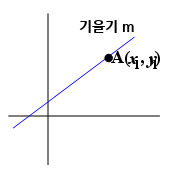 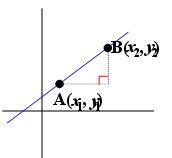
로지스틱 회귀 : 합격, 불합격과 같이 두가지의 경우만 가지고 0~1사이의 값을 가지며 두개의 합을 구하면 1이된다.
                  
                  H(x) = sigmoid(Wx + b)
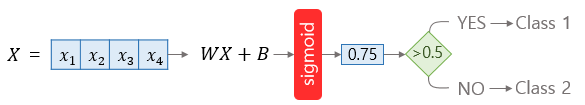
1. W가 1이고 b가 0인 그래프

소프트맥스 회귀 : 세 개 이상의 답 중 하나를 고르는 문제를 다중 클래스 분류(Multi-class Classification)라고 합니다.
                  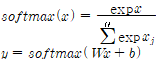
                  H(x) = softmax(Wx + b)
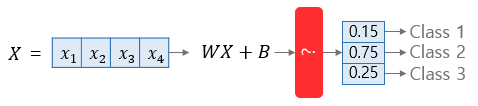


#비용 함수(cost function) = 손실 함수(loss function) = 오차 함수(error function) = 목적 함수(objective function)
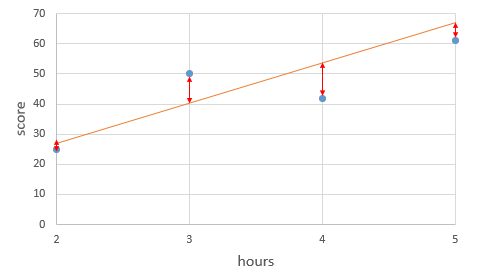

위 그림은 임의로 그려진 주황색 선에 대해서 각 실제값(4개의 점)과 직선의 예측값(동일한 값에서의 직선의 값)에 대한 값의 차이를 빨간색 화살표 ↕로 표현한 것이다. 각 실제값과 각 예측값과의 차이고, 이를 각 실제값에서의 오차라고 말할 수 있다. 이 직선의 예측값들과 실제값들과의 총 오차(total error)는 어떻게 구할까? 직관적으로 생각하기에 모든 오차를 다 더하면 될 것 같다. 각 오차를 전부 더해보자.

위 주황색 직선의 식은 y = 13x + 1 이며, 각 오차는 다음과 같습니다.

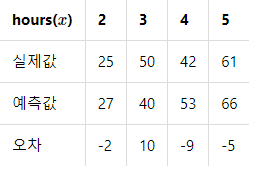

각 오차를 계산해봤다. 그런데 수식적으로 단순히 '오차 = 실제값 - 예측값'으로 정의하면 오차값이 음수가 나오는 경우가 생긴다. 예를 들어 위의 표에서만 봐도 오차가 음수인 경우가 3번이나 된다.

이 경우, 오차를 모두 더하면 덧셈 과정에서 오차값이 +가 되었다가 -되었다가 하므로 제대로 된 오차의 크기를 측정할 수 없다. 그래서 오차를 그냥 전부 더하는 것이 아니라, 각 오차들을 제곱해준 뒤에 전부 더하겠다.

이를 수식으로 표현하면 아래와 같습니다. 단, 여기서 은 갖고 있는 데이터의 개수를 의미합니다.

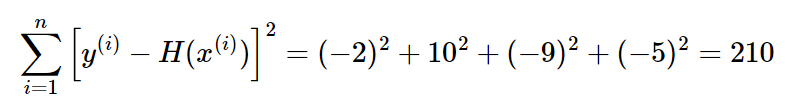

이때 데이터의 개수인 으로 나누면, 오차의 제곱합에 대한 평균을 구할 수 있는데 이를 평균 제곱 오차(Mean Squared Error, MSE)라고 한다. 수식은 아래와 같다.

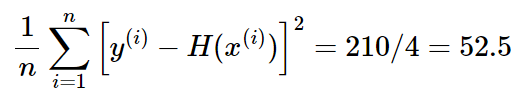

이를 실제로 계산하면 52.5가 된다. 이는 y = 13x + 1의 예측값과 실제값의 평균 제곱 오차의 값이 52.5임을 의미한다.

평균 제곱 오차는 이번 회귀 문제에서 적절한 W와 b를 찾기위해서 최적화된 식이다. 그 이유는 평균 제곱 오차의 값을 최소값으로 만드는  W와 b를 찾아내는 것이 가장 훈련 데이터를 잘 반영한 직선을 찾아내는 일이기 때문이다.

평균 제곱 오차를  W와 b에 의한 비용 함수(Cost function)로 재정의해보면 다음과 같다.

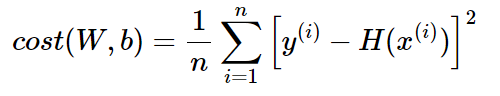

경사 하강법(Gradient Descent)
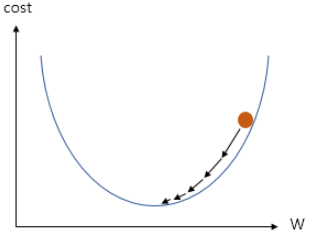

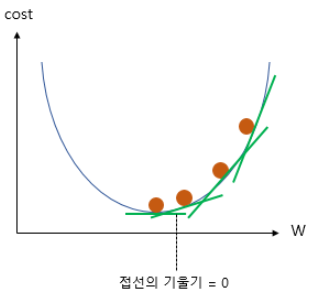

In [24]:
import pandas as pd
import numpy as np
import tensorflow.compat.v1 as tf

tf.compat.v1.disable_eager_execution()

# 키, 몸무게, 레이블이 적힌 CSV 파일 읽어 들이기 --- (※1)
csv = pd.read_csv("bmi.csv")  # 판다스를 사용해서 간단하게 csv파일을 읽어 온다.
# 데이터 정규화 --- (※2)   # 데이터를 0이상, 1미만으로 저장
csv["height"] = csv["height"] / 200    # 키의 최댓값은 200cm
csv["weight"] = csv["weight"] / 100    # 몸무게의 최대값은 100kg
# 레이블을 배열로 변환하기 --- (※3)
# - thin=(1,0,0) / normal=(0,1,0) / fat=(0,0,1)
bclass = {"thin": [1,0,0], "normal": [0,1,0], "fat": [0,0,1]}
csv["label_pat"] = csv["label"].apply(lambda x : np.array(bclass[x])) 
# csv["label"]에 있는 값이 "thin"이면 [1,0,0], "normal"이면 [0,1,0], "fat"이면 [0,0,1]을 csv에 "label_pat"를 만들어 저장

# 테스트를 위한 데이터 분류 --- (※4)
test_csv = csv[15000:20000] # 2만개의 데이터 중 5000개를 테스트용 데이터로.
test_pat = test_csv[["weight","height"]]
test_ans = list(test_csv["label_pat"])
# 데이터 플로우 그래프 구축하기 --- (※5)
# 플레이스홀더 선언하기
x  = tf.placeholder(tf.float32, [None, 2]) # 키와 몸무게 데이터 넣기
y_ = tf.placeholder(tf.float32, [None, 3]) # 정답 레이블 넣기
# 변수 선언하기 --- (※6)
W = tf.Variable(tf.zeros([2,3])); # 가중치  
b = tf.Variable(tf.zeros([3]));    # 바이어스
# 소프트맥스 회귀 정의하기 --- (※7)
y = tf.nn.softmax(tf.matmul(x, W) + b)
# 모델 훈련하기 --- (※8)
cross_entropy = -tf.reduce_sum(y_ * tf.log(y))   # 모든 차원의 합을 구한다,
optimizer = tf.train.GradientDescentOptimizer(0.01) # 경사하강법을 이용해서 cost가 가장 작은 값을 가지게 하는 W를 찾는다.
train = optimizer.minimize(cross_entropy) ### 모델 생성
# 정답률 구하기
predict = tf.equal(tf.argmax(y, 1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(predict, tf.float32))
# 세션 시작하기
sess = tf.Session()
sess.run(tf.global_variables_initializer()) # 변수 초기화하기
# 학습시키기
for step in range(3500):
    i = (step * 100) % 14000  # 100씩 증가하고 13900까지

    rows = csv[1 + i : 1 + i + 100]   # csv[101 : 201], csv[201:301]
    x_pat = rows[["weight","height"]]
    y_ans = list(rows["label_pat"])
    fd = {x: x_pat, y_: y_ans} # 학습 데이터 
    sess.run(train, feed_dict=fd)
    if step % 500 == 0:
        cre = sess.run(cross_entropy, feed_dict=fd)
        acc = sess.run(accuracy, feed_dict={x: test_pat, y_: test_ans})
        print("step=", step, "cre=", cre, "acc=", acc)
# 최종적인 정답률 구하기
acc = sess.run(accuracy, feed_dict={x: test_pat, y_: test_ans})
print("정답률 =", acc)

step= 0 cre= 109.39801 acc= 0.2926
step= 500 cre= 58.282223 acc= 0.868
step= 1000 cre= 46.247185 acc= 0.9282
step= 1500 cre= 38.766785 acc= 0.944
step= 2000 cre= 36.01812 acc= 0.9582
step= 2500 cre= 34.1697 acc= 0.9604
step= 3000 cre= 31.909721 acc= 0.9654
정답률 = 0.9686


In [13]:
# 5-5.TensorBoard로 시각화하기
# pip install --upgrade --user tensorflow_gpu
# C:\>tensorboard --logdir==logdir
import tensorflow.compat.v1 as tf

tf.compat.v1.disable_eager_execution()

# 데이터 플로우 그래프 구축하기 --- (※1)
a = tf.constant(20, name="a")
b = tf.constant(30, name="b")
mul_op = a * b

# 세션 생성하기 --- (※2)
sess = tf.Session()

# TensorBoard 사용하기 --- (※3)
tw = tf.summary.FileWriter("log_dir", graph=sess.graph)

# 세션 실행하기  --- (※4)
print(sess.run(mul_op))

600


In [6]:
import tensorflow.compat.v1 as tf

tf.compat.v1.disable_eager_execution()

# 상수와 변수 선언하기 --- (※1)
a = tf.constant(100, name="a")
b = tf.constant(200, name="b")
c = tf.constant(300, name="c")
v = tf.Variable(0, name="v")

# 곱셈을 수행하는 그래프 정의하기 --- (※2)
calc_op = a + b * c 
assign_op = tf.assign(v, calc_op)

# 세션 생성하기 --- (※3)
sess = tf.Session()

# TensorBoard 사용하기 --- (※4)
tw = tf.summary.FileWriter("log_dir", graph=sess.graph)

# 세션 실행하기  --- (※5)
sess.run(assign_op)
print(sess.run(v))

60100


In [9]:
import pandas as pd
import numpy as np
import tensorflow.compat.v1 as tf

tf.compat.v1.disable_eager_execution()

# 키, 몸무게, 레이블이 적힌 CSV 파일 읽어 들이기 --- (※1)
csv = pd.read_csv("bmi.csv")    
# 데이터 정규화 --- (※2) 
csv["height"] = csv["height"] / 200 
csv["weight"] = csv["weight"] / 100 
# 레이블을 배열로 변환하기
# - thin=(1,0,0) / normal=(0,1,0) / fat=(0,0,1)
bclass = {"thin": [1,0,0], "normal": [0,1,0], "fat": [0,0,1]}
csv["label_pat"] = csv["label"].apply(lambda x : np.array(bclass[x]))

# 테스트를 위한 데이터 분류
test_csv = csv[15000:20000]
test_pat = test_csv[["weight","height"]]
test_ans = list(test_csv["label_pat"])

# 플레이스홀더로 이름 붙이기
x  = tf.placeholder(tf.float32, [None, 2], name="x") 
y_ = tf.placeholder(tf.float32, [None, 3], name="y_") 

# interface 부분을 스코프로 묶기
with tf.name_scope('interface') as scope:
    W = tf.Variable(tf.zeros([2, 3]), name="W"); # 가중치
    b = tf.Variable(tf.zeros([3]), name="b"); # 바이어스
    # 소프트맥스 회귀 정의 --- (※7)
    with tf.name_scope('softmax') as scope:
        y = tf.nn.softmax(tf.matmul(x, W) + b)

#  loss 계산을 스코프로 묶기
with tf.name_scope('loss') as scope:
    cross_entropy = -tf.reduce_sum(y_ * tf.log(y))

# training 계산을 스코프로 묶기
with tf.name_scope('training') as scope:
    optimizer = tf.train.GradientDescentOptimizer(0.01)
    train = optimizer.minimize(cross_entropy)

#  accuracy 계산을 스코프로 묶기
with tf.name_scope('accuracy') as scope:
    predict = tf.equal(tf.argmax(y, 1), tf.argmax(y_,1))
    accuracy = tf.reduce_mean(tf.cast(predict, tf.float32))

# 세션 시작하기
with tf.Session() as sess:
    tw = tf.summary.FileWriter("log_dir", graph=sess.graph)
    sess.run(tf.global_variables_initializer()) # 변수 초기화하기
    # 테스트 데이터를 이용해 학습하기
    for step in range(3500):
        i = (step * 100) % 14000         # 100개씩 3500개를 학습시킨다.
        rows = csv[1 + i : 1 + i + 100]
        x_pat = rows[["weight","height"]]
        y_ans = list(rows["label_pat"])
        fd = {x: x_pat, y_: y_ans}
        sess.run(train, feed_dict=fd)
        if step % 500 == 0:
            cre = sess.run(cross_entropy, feed_dict=fd)
            acc = sess.run(accuracy, feed_dict={x: test_pat, y_: test_ans})
            print("step=", step, "cre=", cre, "acc=", acc)  # 학습 상태를 출력한다.

    # 최종적인 정답률 구하기
    acc = sess.run(accuracy, feed_dict={x: test_pat, y_: test_ans})
    print("정답률=", acc)

step= 0 cre= 109.39801 acc= 0.2926
step= 500 cre= 58.282223 acc= 0.868
step= 1000 cre= 46.247185 acc= 0.9282
step= 1500 cre= 38.766785 acc= 0.944
step= 2000 cre= 36.01812 acc= 0.9582
step= 2500 cre= 34.1697 acc= 0.9604
step= 3000 cre= 31.909721 acc= 0.9654
정답률= 0.9686


In [6]:
#input_data.py와 mnist.py 파일을 현 디렉터리에 복사한다.


import input_data
mnist = input_data.read_data_sets("mnist/", one_hot=True)
mnist.train.images  # 훈련전용 데이터

Extracting mnist/train-images-idx3-ubyte.gz
Extracting mnist/train-labels-idx1-ubyte.gz
Extracting mnist/t10k-images-idx3-ubyte.gz
Extracting mnist/t10k-labels-idx1-ubyte.gz


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [8]:
len(mnist.train.images)

55000

In [11]:
mnist.train.labels # 훈련 전용 데이터의 레이블

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [12]:
len(mnist.train.labels)

55000

In [14]:
len(mnist.train.labels[0])

10

In [15]:
mnist.train.labels[0]                  # 7   index가 숫자를 의미한다.

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [16]:
mnist.train.labels[1]                  # 3

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [17]:
mnist.train.labels[2]                  # 4

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])

In [18]:
mnist.train.labels[3]                  # 6

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

# 합성곱 연산(Convolution operation)
합성곱층은 합성곱 연산을 통해서 이미지의 특징을 추출하는 역할을 합니다. 
우선, 합성곱 연산에 대해서 이해해봅시다. 
합성곱은 영어로 컨볼루션이라고도 불리는데, 커널(kernel) 또는 필터(filter)라는 n * m 크기의 행렬로 높이(height) x 너비(width) 크기의 
이미지를 처음부터 끝까지 겹치며 훑으면서 크기의 겹쳐지는 부분의 각 이미지와 커널의 원소의 값을 곱해서 모두 더한 값을 출력으로 하는 
것을 말합니다. 이때, 이미지의 가장 왼쪽 위부터 가장 오른쪽까지 순차적으로 훑습니다.

커널(kernel)은 일반적으로 3 × 3 또는 5 × 5를 사용합니다.

1. 첫번째 스텝
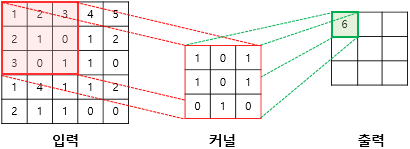

(1×1) + (2×0) + (3×1) + (2×1) + (1×0) + (0×1) + (3×0) + (0×1) + (1×0) = 6

2. 두번째 스텝
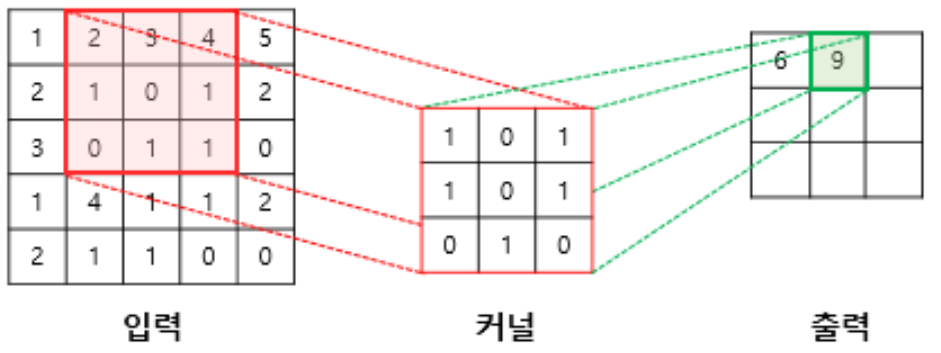

(2×1) + (3×0) + (4×1) + (1×1) + (0×0) + (1×1) + (0×0) + (1×1) + (1×0) = 9

3. 세번째 스텝
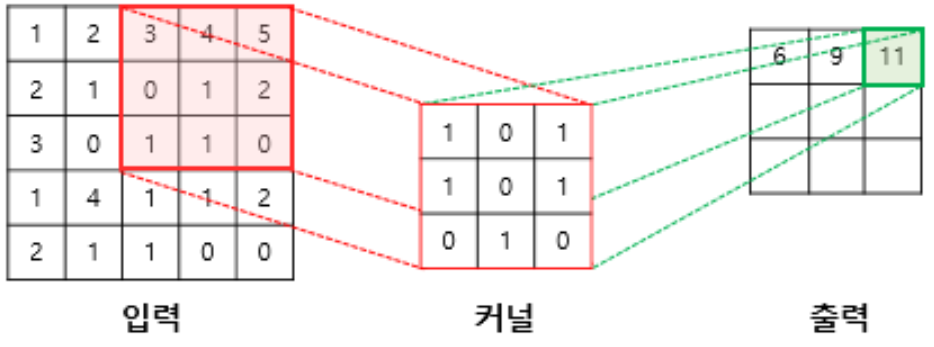
(3×1) + (4×0) + (5×1) + (0×1) + (1×0) + (2×1) + (1×0) + (1×1) + (0×0) = 11

4. 네번째 스텝
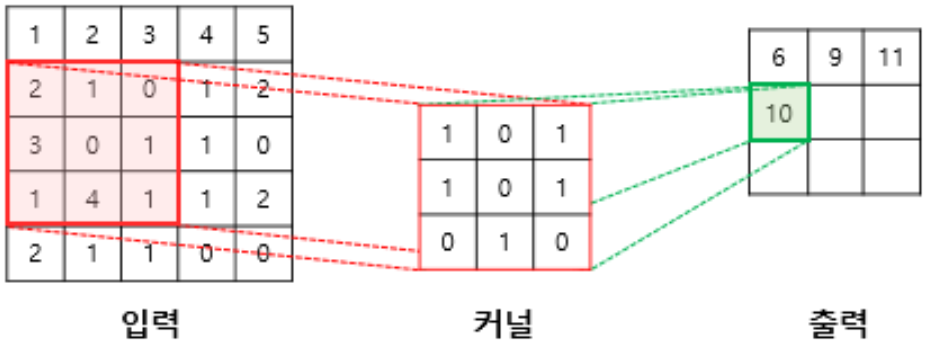
(3×1) + (4×0) + (5×1) + (0×1) + (1×0) + (2×1) + (1×0) + (1×1) + (0×0) = 11

위 연산을 총 9번의 스텝까지 마쳤다고 가정하였을 때, 최종 결과는 아래와 같습니다.
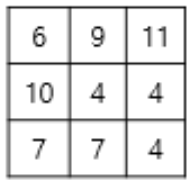


위의 예제에서는 커널의 크기가 3 × 3이었지만, 커널의 크기는 사용자가 정할 수 있습니다. 또한 커널의 이동 범위가 위의 예제에서는 한 칸이었지만, 이 또한 사용자가 정할 수 있습니다. 이러한 이동 범위를 스트라이드(stride)라고 합니다.

아래의 예제는 스트라이드가 2일 경우에 5 × 5 이미지에 합성곱 연산을 수행하는 3 × 3 커널의 움직임을 보여줍니다. 최종적으로 2 × 2의 크기의 특성 맵을 얻습니다.

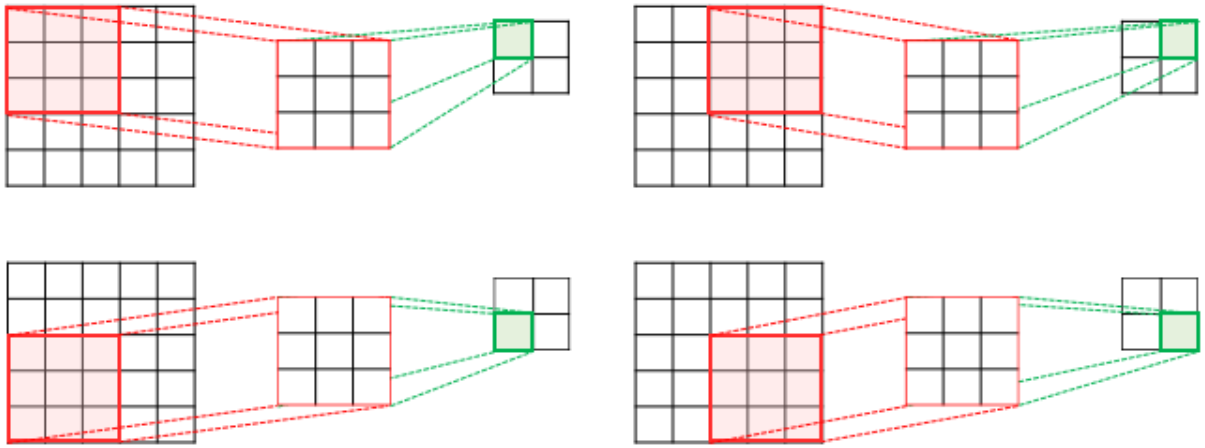

4. 패딩(Padding)
위의 예에서 5 × 5 이미지에 3 × 3의 커널로 합성곱 연산을 하였을 때, 스트라이드가 1일 경우에는 3 × 3의 특성 맵을 얻었습니다. 이와 같이 합성곱 연산의 결과로 얻은 특성 맵은 입력보다 크기가 작아진다는 특징이 있습니다. 만약, 합성곱 층을 여러개 쌓았다면 최종적으로 얻은 특성 맵은 초기 입력보다 매우 작아진 상태가 되버립니다. 합성곱 연산 이후에도 특성 맵의 크기가 입력의 크기와 동일하게 유지되도록 하고 싶다면 패딩(padding)을 사용하면 됩니다.

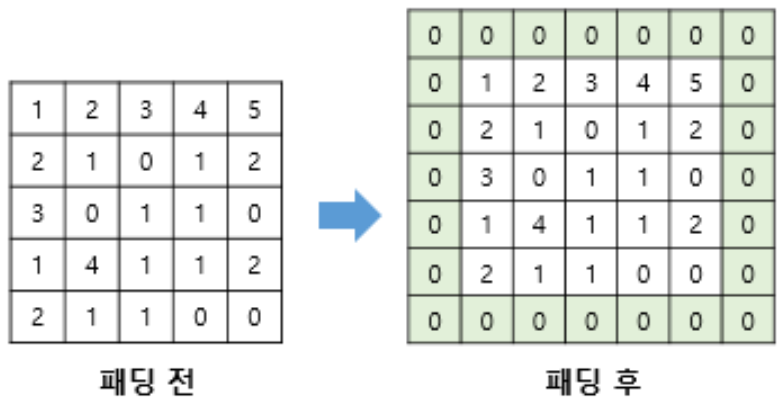

패딩은 (합성곱 연산을 하기 전에) 입력의 가장자리에 지정된 개수의 폭만큼 행과 열을 추가해주는 것을 말합니다. 좀 더 쉽게 설명하면 지정된 개수의 폭만큼 테두리를 추가합니다. 주로 값을 0으로 채우는 제로 패딩(zero padding)을 사용합니다. 위의 그림은 5 × 5 이미지에 1폭짜리 제로 패딩을 사용하여 위, 아래에 하나의 행을 좌, 우에 하나의 열을 추가한 모습을 보여줍니다.

커널은 주로 3 × 3 또는 5 × 5를 사용한다고 언급한 바 있습니다. 만약 스트라이드가 1이라고 하였을 때, 3 × 3 크기의 커널을 사용한다면 1폭짜리 제로 패딩을 사용하고, 5 × 5 크기의 커널을 사용한다면 2폭 짜리 제로 패딩을 사용하면 입력과 특성 맵의 크기를 보존할 수 있습니다. 예를 들어 5 × 5 크기의 이미지에 1폭짜리 제로 패딩을 하면 7 × 7 이미지가 되는데, 여기에 3 × 3의 커널을 사용하여 1 스트라이드로 합성곱을 한 후의 특성 맵은 기존의 입력 이미지의 크기와 같은 5 × 5가 됩니다.

풀링을 하는 이유

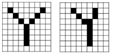

사람이 보기에는 두 그림 모두 알파벳 Y로 손쉽게 판단이 가능하지만, 기계가 보기에는 각 픽셀마다 가진 값이 거의 상이하므로 완전히 다른 값을 가진 입력이다. 그런데 이미지라는 것은 위와 같이 같은 대상이라도 휘어지거나, 이동되었거나, 방향이 뒤틀렸거나 등 다양한 변형이 존재한다.

이를 풀링을 하면 같은 글자로 인식할 수 있게 된다.

# 채널(Channel)
기계는 글자나 이미지보다 숫자. 다시 말해, 텐서를 더 잘 처리할 수 있다. 이미지는 (높이, 너비, 채널)이라는 3차원 텐서이다. 여기서 높이는 이미지의 세로 방향 픽셀 수, 너비는 이미지의 가로 방향 픽셀 수, 채널은 색 성분을 의미합니다. 흑백 이미지는 채널 수가 1이며, 각 픽셀은 0부터 255 사이의 값을 가진다. 아래는 28 × 28 픽셀의 손글씨 데이터를 보여준다.
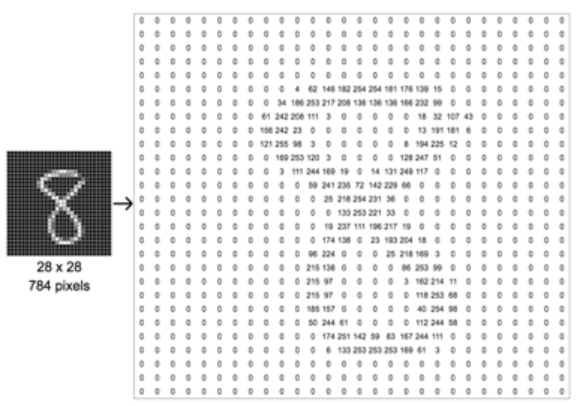

위 손글씨 데이터는 흑백 이미지므로 채널 수가 1임을 고려하면 (28 × 28 × 1)의 크기를 가지는 3차원 텐서이다. 그렇다면 흑백이 아니라 우리가 통상적으로 접하게 되는 컬러 이미지는 어떨까? 컬러 이미지는 적색(Red), 녹색(Green), 청색(Blue) 채널 수가 3개이다.
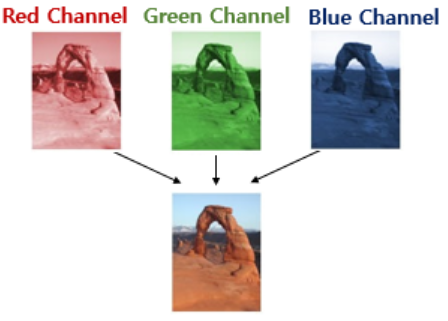

하나의 픽셀은 세 가지 색깔, 삼원색의 조합으로 이루어진다. 만약, 높이가 28, 너비가 28인 컬러 이미지가 있다면 이 이미지의 텐서는 (28 × 28 × 3)의 크기를 가지는 3차원 텐서이다. 채널은 때로는 깊이(depth)라고도 한다. 이 경우 이미지는 (높이, 너비, 깊이)라는 3차원 텐서로 표현된다고 말할 수 있을 것이다.

In [5]:
import tensorflow.compat.v1 as tf
import input_data 
tf.disable_v2_behavior()
# 이 예제는 텐서플로 1.14에서 작동합니다.
# 텐서플로 2.X 환경은 keras-mnist.py 예제를 참고하시기 바랍니다.

# MNIST 손글씨 이미지 데이터 읽어 들이기 --- (※1)
mnist = input_data.read_data_sets("mnist/", one_hot=True)
pixels = 28 * 28 # 28x28 픽셀
nums = 10 # 0-9 사이의 카테고리
# 플레이스홀더 정의하기 --- (※2)
x  = tf.placeholder(tf.float32, shape=(None, pixels), name="x") # x는 이미지 데이터 배열을 넣을 곳
y_ = tf.placeholder(tf.float32, shape=(None, nums), name="y_")  # y_은 정답 레이블을 넣을 곳
# 가중치와 바이어스를 초기화하는 함수 --- (※3)
def weight_variable(name, shape): 
    W_init = tf.truncated_normal(shape, stddev=0.1)
    W = tf.Variable(W_init, name="W_"+name) # 가중치 변수
    return W
def bias_variable(name, size):  
    b_init = tf.constant(0.1, shape=[size]) 
    b = tf.Variable(b_init, name="b_"+name) # 바이어스 변수
    return b
# 합성곱 계층을 만드는 함수 --- (※4)
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1,1,1,1], padding='SAME')
# 최대 풀링층을 만드는 함수 --- (※5)
def max_pool(x):
    return tf.nn.max_pool(x, ksize=[1,2,2,1],
        strides=[1,2,2,1], padding='SAME')
# 합성곱층1 --- (※6)
with tf.name_scope('conv1') as scope:
    W_conv1 = weight_variable('conv1', [5, 5, 1, 32]) # 커널 5 x 5필터로 입력 채널1, 출력 채널 32
    b_conv1 = bias_variable('conv1', 32)
    # 순서 또는 텐서 요소의 총 개수를 변경하지 않고, 그 재사용 할 수 있도록 기본 데이터 버퍼. 
    #이것은 얼마나 큰 텐서가 작동하는지에 관계없이 빠른 작동을합니다.
    x_image = tf.reshape(x, [-1, 28, 28, 1])  
    
    h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
# 풀링층1 ---- (※7)
with tf.name_scope('pool1') as scope:
    h_pool1 = max_pool(h_conv1)
# 합성곱층2 --- (※8)
with tf.name_scope('conv2') as scope:
    W_conv2 = weight_variable('conv2', [5, 5, 32, 64]) # 커널 5 x 5의 필터로 입력 채널32, 출력 채널 64
    b_conv2 = bias_variable('conv2', 64)
    h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
# 풀링층2 --- (※9)
with tf.name_scope('pool2') as scope:
    h_pool2 = max_pool(h_conv2)
# 전결합층 --- (※10)
with tf.name_scope('fully_connected') as scope:
    n = 7 * 7 * 64
    W_fc = weight_variable('fc', [n, 1024])
    b_fc = bias_variable('fc', 1024)
    h_pool2_flat = tf.reshape(h_pool2, [-1, n])
    h_fc = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc) + b_fc)        
# 드롭아웃(과잉 적합) 막기 --- (※11)
with tf.name_scope('dropout') as scope:
    keep_prob = tf.placeholder(tf.float32)
    h_fc_drop = tf.nn.dropout(h_fc, keep_prob)
# 출력층 --- (※12)
with tf.name_scope('readout') as scope:
    W_fc2 = weight_variable('fc2', [1024, 10])
    b_fc2 = bias_variable('fc2', 10)
    y_conv = tf.nn.softmax(tf.matmul(h_fc_drop, W_fc2) + b_fc2)
# 모델 학습시키기 --- (※13)
with tf.name_scope('loss') as scope:
    cross_entoropy = -tf.reduce_sum(y_ * tf.log(y_conv))
with tf.name_scope('training') as scope:
    optimizer = tf.train.AdamOptimizer(1e-4)
    train_step = optimizer.minimize(cross_entoropy)
# 모델 평가하기 --- (※14)
with tf.name_scope('predict') as scope:
    predict_step = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y_, 1))
    accuracy_step = tf.reduce_mean(tf.cast(predict_step, tf.float32))
# feed_dict 설정하기 --- (※15)
def set_feed(images, labels, prob):
    return {x: images, y_: labels, keep_prob: prob}
# 세션 시작하기 --- (※16)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    # TensorBoard 준비하기
    tw = tf.summary.FileWriter('log_dir', graph=sess.graph)
    # 테스트 전용 피드 만들기
    test_fd = set_feed(mnist.test.images, mnist.test.labels, 1)
    # 학습 시작하기 ---- (※17)
    for step in range(10000):
        batch = mnist.train.next_batch(50)
        fd = set_feed(batch[0], batch[1], 0.5)
        _, loss = sess.run([train_step, cross_entoropy], feed_dict=fd)
        if step % 100 == 0:
            acc = sess.run(accuracy_step, feed_dict=test_fd)
            print("step=", step, "loss=", loss, "acc=", acc)
    # 최종적인 결과 출력하기
    acc = sess.run(accuracy_step, feed_dict=test_fd)
    print("정답률 =", acc)

Instructions for updating:
non-resource variables are not supported in the long term
Extracting mnist/train-images-idx3-ubyte.gz
Extracting mnist/train-labels-idx1-ubyte.gz
Extracting mnist/t10k-images-idx3-ubyte.gz
Extracting mnist/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
step= 0 loss= 668.7905 acc= 0.1018
step= 100 loss= 49.430412 acc= 0.8507
step= 200 loss= 23.118702 acc= 0.9037
step= 300 loss= 22.499504 acc= 0.9304
step= 400 loss= 24.87172 acc= 0.9417
step= 500 loss= 14.888435 acc= 0.9424
step= 600 loss= 8.64942 acc= 0.9529
step= 700 loss= 14.880329 acc= 0.9562
step= 800 loss= 7.7161884 acc= 0.9591
step= 900 loss= 21.15065 acc= 0.9603
step= 1000 loss= 8.861255 acc= 0.9609
step= 1100 loss= 4.303337 acc= 0.9671
step= 1200 loss= 14.490998 acc= 0.9701
step= 1300 loss= 18.925367 acc= 0.9699
step= 1400 loss= 6.4435906 acc= 0.9678
step= 1500 loss= 5.3169317 acc= 0.9723
step= 1600 loss= 3.63

Dense() : 전결합층(fully-conntected layer)을 추가합니다. model.add()를 통해 추가할 수 있습니다.
    
model = Sequential()
model.add(Dense(1, input_dim=3, activation='relu'))

model.add()라는 코드를 통해 층을 단계적으로 추가

model.add(Dense(1, input_dim=3, activation='relu'))

첫번째 인자 = 출력 뉴런의 수.

input_dim = 입력 뉴런의 수. (입력의 차원)

activation = 활성화 함수.
- linear : 디폴트 값으로 별도 활성화 함수 없이 입력 뉴런과 가중치의 계산 결과 그대로 출력. Ex) 선형 회귀
- sigmoid : 시그모이드 함수. 이진 분류 문제에서 출력층에 주로 사용되는 활성화 함수.
- softmax : 소프트맥스 함수. 셋 이상을 분류하는 다중 클래스 분류 문제에서 출력층에 주로 사용되는 활성화 함수.
- relu : 렐루 함수. 은닉층에 주로 사용되는 활성화 함수.

위 코드에서 사용된 Dense()의 의미를 보겠다. 
- 첫번째 인자의 값은 1인데 이는 총 1개의 출력 뉴런을 의미한다.  
- 두번째 인자인 input_dim은 입력층의 뉴런 수를 의미한다. 이 경우에는 3입니다. 3개의 입력층 뉴런과 1개의 출력층 뉴런을 만들었다. 

이를 시각화하면 다음과 같다.

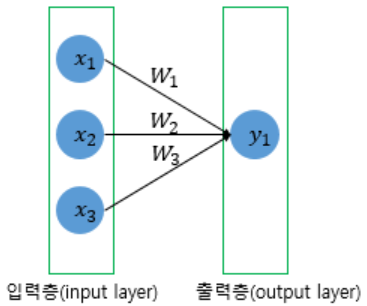

model = Sequential()

model.add(Dense(8, input_dim=4, activation='relu'))

model.add(Dense(1, activation='sigmoid')) # 출력층


이번에는 Dense()가 두번 사용되었다. Dense()가 처음 사용되었을 때와 추가로 사용되었을 때의 인자는 조금 다르다. 
- 첫번째 사용된 Dense()의 8이라는 값은 더 이상 출력층의 뉴런이 아니라 은닉층의 뉴런이다. 뒤에 층이 하나 더 생겼기 때문이다.
- 두번째 Dense()는 input_dim 인자가 없는데, 이는 이미 이전층의 뉴런의 수가 8개라는 사실을 알고있기 때문이다. 위의 코드에서 두번째 Dense()는 마지막 층이므로, 첫번째 인자 1은 결국 출력층의 뉴런의 개수가 된다. 

이를 시각화하면 다음과 같습니다.

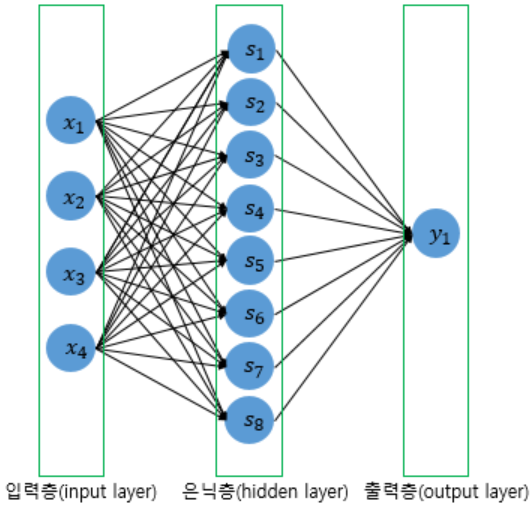


#dropout 

뉴런이라고 부르는 노드를 무작위로 껐다 켰다를 반복하는 것을 말한다.

Dropout을 사용하면 
- (1) overfitting을 방지할 수 있으며, 
- (2) 성능을 향상할 수 있다. 매번 다른 형태의 노드로 학습하기 때문에, 여러 형태의 네트워크들을 통해서 
- (3) 앙상블 효과를 낼 수도 있다. 


In [17]:
#  Keras로 다양한 딥러닝 해보기
from tensorflow.keras.datasets import mnist
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import utils
# MNIST 데이터 읽어 들이기 --- (※1)
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# 데이터를 float32 자료형으로 변환하고 정규화하기 --- (※2)
X_train = X_train.reshape(60000, 784).astype('float32')
X_test  = X_test.reshape(10000, 784).astype('float')
X_train /= 255
X_test  /= 255
# 레이블 데이터를 0-9까지의 카테고리를 나타내는 배열로 변환하기 --- (※2a)
y_train = utils.to_categorical(y_train, 10)
y_test  = utils.to_categorical(y_test, 10)
# 모델 구조 정의하기 --- (※3)
model = Sequential()
model.add(Dense(512, input_shape=(784,)))  # 층 추가
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(512))                     # 층 추가
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))                      # 층 추가
model.add(Activation('softmax'))
# 모델 구축하기 --- (※4)
# optimizer : 훈련 과정을 설정하는 옵티마이저를 설정한다. 'adam'이나 'sgd'와 같이 문자열로 지정할 수도 있습니다.
# loss : 훈련 과정에서 사용할 손실 함수(loss function)를 설정합니다.
# metrics : 훈련을 모니터링하기 위한 지표를 선택합니다.
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(),
    metrics=['accuracy'])
# 데이터 훈련하기 --- (※5)
hist = model.fit(X_train, y_train)
# 테스트 데이터로 평가하기 --- (※6)
# 첫번째 인자 = 테스트 데이터에 해당됩니다.
# 두번째 인자 = 지도 학습에서 레이블 테스트 데이터에 해당됩니다.
# batch_size = 배치 크기.
score = model.evaluate(X_test, y_test, verbose=1)
print('loss=', score[0])
print('accuracy=', score[1])

11501568/11490434 [==============================] - 1s 0us/step
Train on 60000 samples
60000/60000 [==============================] - 9s 143us/sample - loss: 0.2193 - acc: 0.9326


c:\users\user\appdata\local\programs\python\python38\lib\site-packages\keras\engine\training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


loss= 0.10841566259423271
accuracy= 0.9654


In [4]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd, numpy as np
# BMI 데이터를 읽어 들이고 정규화하기 --- (※1)
csv = pd.read_csv("bmi.csv")
# 몸무게와 키 데이터
csv["weight"] /= 100
csv["height"] /= 200
X = csv[["weight", "height"]]  # --- (※1a)
# 레이블
bclass = {"thin":[1,0,0], "normal":[0,1,0], "fat":[0,0,1]}
y = np.empty((20000,3))
for i, v in enumerate(csv["label"]):
    y[i] = bclass[v]
# 훈련 전용 데이터와 테스트 전용 데이터로 나누기 --- (※2)
X_train, y_train = X[1:15001], y[1:15001]
X_test,  y_test  = X[15001:20001], y[15001:20001] 
# 모델 구조 정의하기 --- (※3)
model = Sequential()
model.add(Dense(512, input_shape=(2,)))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Dense(3))
model.add(Activation('softmax'))
# 모델 구축하기 --- (※4)
model.compile(
    loss='categorical_crossentropy',
    optimizer="rmsprop",
    metrics=['accuracy'])
# 데이터 훈련하기 --- (※5)
hist = model.fit(
    X_train, y_train,
    batch_size=100,
    epochs=20,
    validation_split=0.1,
    callbacks=[EarlyStopping(monitor='val_loss', patience=2)],
    verbose=1)
# 테스트 데이터로 평가하기 --- (※6)
score = model.evaluate(X_test, y_test)
print('loss=', score[0])
print('accuracy=', score[1])

Epoch 1/20
135/135 [==============================] - 1s 6ms/step - loss: 0.5192 - accuracy: 0.7919 - val_loss: 0.3331 - val_accuracy: 0.8527
Epoch 2/20
135/135 [==============================] - 1s 5ms/step - loss: 0.2476 - accuracy: 0.9033 - val_loss: 0.1629 - val_accuracy: 0.9480
Epoch 3/20
135/135 [==============================] - 1s 5ms/step - loss: 0.1900 - accuracy: 0.9223 - val_loss: 0.1143 - val_accuracy: 0.9713
Epoch 4/20
135/135 [==============================] - 1s 4ms/step - loss: 0.1623 - accuracy: 0.9292 - val_loss: 0.2209 - val_accuracy: 0.8807
Epoch 5/20
135/135 [==============================] - 1s 4ms/step - loss: 0.1507 - accuracy: 0.9341 - val_loss: 0.0994 - val_accuracy: 0.9647
Epoch 6/20
135/135 [==============================] - 1s 4ms/step - loss: 0.1431 - accuracy: 0.9357 - val_loss: 0.1250 - val_accuracy: 0.9400
Epoch 7/20
135/135 [==============================] - 1s 4ms/step - loss: 0.1389 - accuracy: 0.9408 - val_loss: 0.0663 - val_accuracy: 0.9853
Epoch 